In [30]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf  # for gathering historical data
import talib as ta  # technical analysis library with indicators


In [2]:
# downloading apple stack data for 1 day interval of past 2 years
aapl = yf.download(tickers="aapl", interval="1d", period="2y",auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
# check the data
aapl.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-02-13,152.313965,152.719860,149.413210,149.442909,62199000
2023-02-14,151.670456,152.234772,149.353822,150.601237,61707600
2023-02-15,153.779175,153.947476,151.353639,151.581338,65573800
2023-02-16,152.175339,154.769175,151.818932,151.977323,68167900
2023-02-17,151.026947,151.472451,149.343923,150.828947,59144100


"""
Above we can see that we have downloaded apple stock data.
by doing .head() we get first 5 samples of the data.
"""

In [4]:
# data info 
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2023-02-13 to 2025-02-10
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   500 non-null    float64
 1   (High, AAPL)    500 non-null    float64
 2   (Low, AAPL)     500 non-null    float64
 3   (Open, AAPL)    500 non-null    float64
 4   (Volume, AAPL)  500 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.4 KB


""" Above we can data info of last two years
no. of rows 500 and columns ( Open High Low Close Volume) or (OHLCV) data format
and their is no Null value which means data is consistant as a Time Serise data.
"""


In [5]:
# describe the data
aapl.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,194.015584,195.583740,192.220016,193.803817,5.707253e+07
std,27.052133,27.311487,26.682003,27.049281,2.475981e+07
min,143.859192,145.245232,142.463275,142.938494,2.323470e+07
25%,172.861179,174.772898,171.671663,172.689309,4.435602e+07
50%,187.561951,188.420706,186.238434,187.532487,5.182055e+07
75%,221.921577,223.917130,219.390104,221.208148,6.310718e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


"""
Now above we have describe the data where IQR can be seen along with mean median mode and sample count and also standard deviation"""

In [6]:
# converting the data info pandas data frame and reindexing the headers or columns name
data = pd.DataFrame({
    'Date': aapl.index, 
    'Open': aapl['Open'].values.flatten(),  
    'High': aapl['High'].values.flatten(), 
    'Low': aapl['Low'].values.flatten(),    
    'Close': aapl['Close'].values.flatten()
})

In [7]:
# now calculate the RSI
data["rsi"] = ta.RSI(data["Close"], 14)

In [8]:
# Print data frame
data.tail()

,Date,Open,High,Low,Close,rsi
495,2025-02-04,227.000419,232.873966,226.401072,232.544327,46.860376
496,2025-02-05,228.279016,232.414468,228.019307,232.214691,46.523548
497,2025-02-06,231.035979,233.543232,230.176923,232.963867,47.448086
498,2025-02-07,232.344548,233.743004,227.010401,227.380005,41.666063
499,2025-02-10,229.570007,230.589996,227.199997,227.649994,42.033880


""" Above you can see that last five rows of data with .tail() function has been printed.
Here we can se that at the window interval 14 we have calculated RSI """

In [ ]:
# simple rsi strategy or set of rules to generate buy and sell signals
upper_band, lower_band = 70, 30

# Initialize the Signal column with None
data["Signal"] = None

# Use vectorized operations to set the Signal column
data.loc[data["rsi"] > upper_band, "Signal"] = "Sell"
data.loc[data["rsi"] < lower_band, "Signal"] = "Buy"


In [ ]:
# Buy and sell signals
buy_signals = data[data["Signal"] == "Buy"]
sell_signals = data[data["Signal"] == "Sell"]

In [ ]:
# buy signal data
buy_signals.head()

,Date,Open,High,Low,Close,rsi,Signal
120,2023-08-07,180.560992,181.552377,175.822172,177.309250,29.561646,Buy
123,2023-08-10,177.933846,179.192909,176.070051,176.436859,29.836521,Buy
128,2023-08-17,175.851131,176.218434,172.217758,172.733978,27.516417,Buy
129,2023-08-18,171.046360,173.825991,170.708838,173.220428,29.071976,Buy
224,2024-01-04,181.062899,181.997291,179.800489,180.824341,29.828377,Buy


In [ ]:
# sell signal data
sell_signals.head()


,Date,Open,High,Low,Close,rsi,Signal
75,2023-06-01,176.169179,178.568330,175.405808,178.538589,71.560855,Sell
76,2023-06-02,179.470487,180.214026,177.715731,179.391174,72.817023,Sell
82,2023-06-12,179.708416,182.305840,179.410997,182.206696,71.898754,Sell
83,2023-06-13,181.225249,182.563610,180.868350,181.730850,70.120134,Sell
84,2023-06-14,181.790305,182.801523,180.451944,182.365311,71.145089,Sell


#### Now will plot the buy and sell signal data with help of matplotlib library

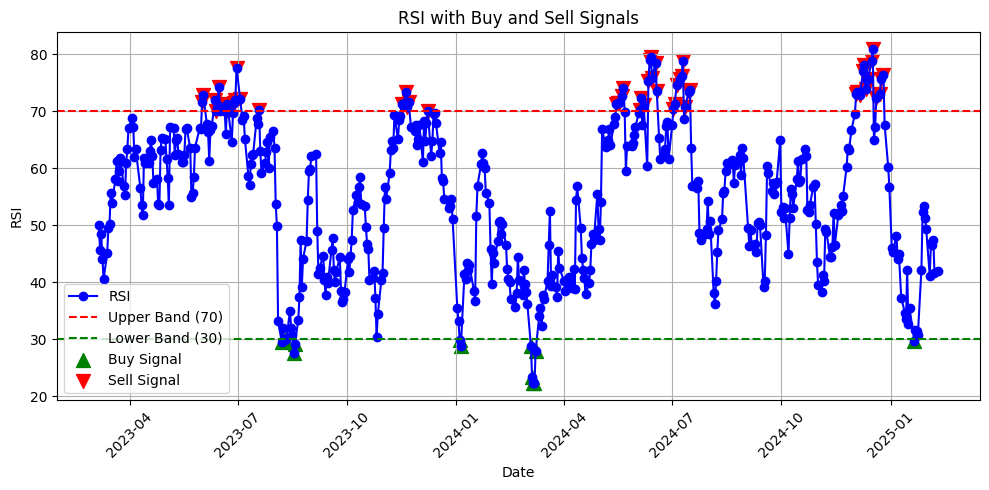

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['rsi'], label='RSI', marker='o', color='blue', linestyle='-')
plt.axhline(y=upper_band, color='red', linestyle='--', label='Upper Band (70)')
plt.axhline(y=lower_band, color='green', linestyle='--', label='Lower Band (30)')

# Mark Buy signals
plt.scatter(buy_signals['Date'], buy_signals['rsi'], color='green', marker='^', s=100, label='Buy Signal')

# Mark Sell signals
plt.scatter(sell_signals['Date'], sell_signals['rsi'], color='red', marker='v', s=100, label='Sell Signal')

# Adding titles and labels
plt.title('RSI with Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()
